Mateusz Saternus

Lab 6

Model comparision

In [37]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import arviz as az

N = (len("Mateusz")+len("Saternus"))*100

Exercise 1

In [38]:
code_1 = CmdStanModel(stan_file='code_1.stan')
data = dict(N=N)
sim_1 = code_1.sample(data=data, iter_sampling=1, fixed_param=True, iter_warmup=0, chains=1, seed=29042020)

code_2 = CmdStanModel(stan_file='code_2.stan')
data = dict(N=N)
sim_2 = code_2.sample(data=data, iter_sampling=1, fixed_param=True, iter_warmup=0, chains=1, seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [39]:
data_sim_1 = sim_1.draws_pd()
data_sim_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,0.01,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,...,0.796778,0.100383,0.590511,1.02858,-1.17021,0.4086,-1.68559,-0.716873,-1.79799,-0.39452


In [40]:
data_sim_2 = sim_2.draws_pd()
data_sim_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,2.70817,0.777181,-1.27227,0.127591,-1.38942,0.246162,1.19873,2.26533,...,-0.393999,-0.649315,0.989486,3.87487,5.39303,0.160863,-1.7459,0.007008,0.789527,1.80712


Exercise 2

In [41]:
code_3 = CmdStanModel(stan_file='code_3.stan')
data_3 = dict(N=N, y=data_sim_1.iloc[:,3:].to_numpy().reshape(-1))
sim_3 = code_3.sample(data= data_3)

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [42]:
code_4 = CmdStanModel(stan_file='code_4.stan')
data_4 = dict(N=N, y=data_sim_1.iloc[:,3:].to_numpy().reshape(-1))
sim_4 = code_4.sample(data= data_4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [43]:
data_comp = {'normal': sim_3, 'student': sim_4}
compare_loo = az.compare(data_comp, ic='loo')
compare_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
student,0,-2267.554950,4.181962,0.000000,1.0,44.427361,0.000000,False,log
normal,1,-2896.983899,30.501245,629.428949,0.0,155.757447,125.118195,True,log


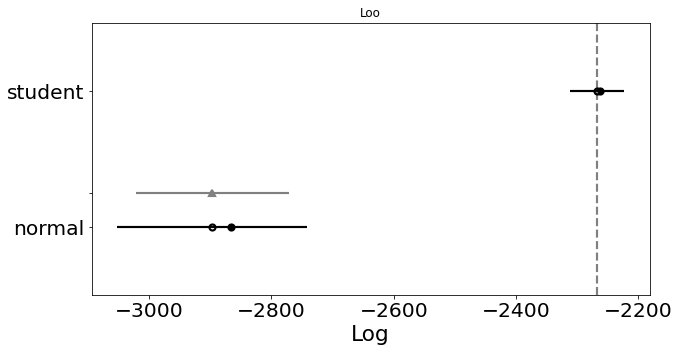

In [44]:
az.plot_compare(compare_loo, figsize = (10,5))
plt.title('Loo')
plt.show()

In [45]:
comparison_waic = az.compare(data_comp, ic='waic')
comparison_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student,0,-2267.553464,4.180476,0.000000,1.000000e+00,44.427010,0.000000,False,log
normal,1,-2898.321162,31.838508,630.767698,4.627623e-09,156.337699,125.722847,True,log


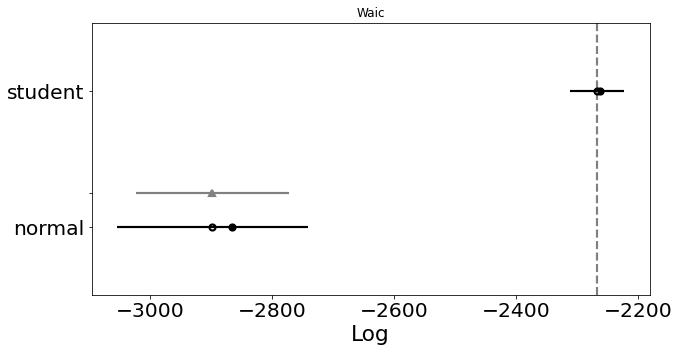

In [46]:
az.plot_compare(comparison_waic, figsize=(10,5))
plt.title('Waic')
plt.show()

Exercise 3

In [47]:
code_5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [48]:
data_compare_5_1 = {'N': N, 'K': 1, 'y': data_sim_2.loc[:, 'y[1]':].values.reshape((N)), 'X': data_sim_2.loc[:, 'X[1,1]': f'X[{N},1]'].values.reshape((N, 1))}
sim_5_1=code_5.sample(data=data_compare_5_1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [49]:
data_compare_5_2 = {'N': N, 'K': 2, 'y': data_sim_2.loc[:, 'y[1]':].values.reshape((N)), 'X': data_sim_2.loc[:, 'X[1,1]': f'X[{N},2]'].values.reshape((N, 2))}
sim_5_2=code_5.sample(data=data_compare_5_2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [50]:
data_compare_5_3 = {'N': N, 'K': 3, 'y': data_sim_2.loc[:, 'y[1]':].values.reshape((N)), 'X': data_sim_2.loc[:, 'X[1,1]': f'X[{N},3]'].values.reshape((N, 3))}
sim_5_3=code_5.sample(data=data_compare_5_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [51]:
data_comp2 = {'model_5_1': sim_5_1, 'model_5_2': sim_5_2, 'model_5_3': sim_5_3}
compare_loo = az.compare(data_comp2, ic='loo')
compare_loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_5_1,0,-2712.020636,1.927629,0.000000,1.000000e+00,26.997249,0.000000,False,log
model_5_2,1,-3515.196788,2.922122,803.176152,2.974597e-14,26.456059,30.311209,False,log
model_5_3,2,-3516.305759,4.020031,804.285124,0.000000e+00,26.401706,30.274696,False,log


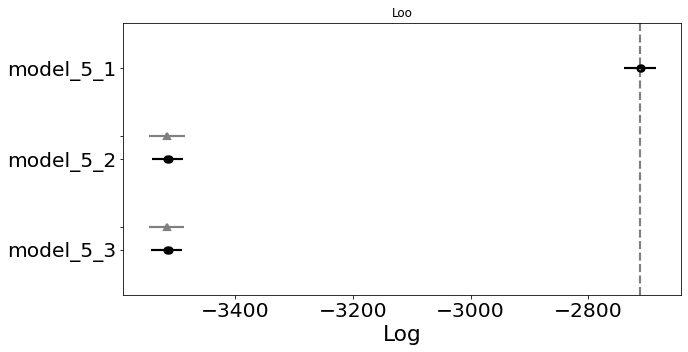

In [52]:
az.plot_compare(compare_loo, figsize = (10,5))
plt.title('Loo')
plt.show()

In [53]:
compare_waic = az.compare(data_comp2, ic='waic')
compare_waic

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_5_1,0,-2712.020724,1.927717,0.000000,1.000000e+00,26.997257,0.000000,False,log
model_5_2,1,-3515.197013,2.922347,803.176289,2.063079e-10,26.456091,30.311230,False,log
model_5_3,2,-3516.305628,4.019899,804.284904,0.000000e+00,26.401689,30.274687,False,log


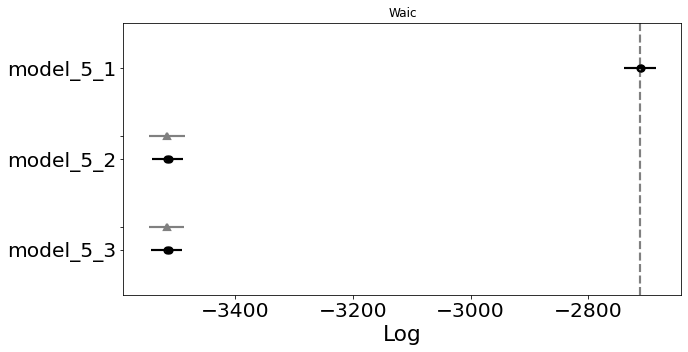

In [54]:
az.plot_compare(compare_waic, figsize = (10,5))
plt.title('Waic')
plt.show()